# Introduction

In [1]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('music_dataset_mod.csv')  
df.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


##     Domain Analysis
1. **Tempo** : Beats per minute (BPM) of the track.
2. **Dynamic Range** : The range between the quietest and loudest parts of a track, typically measured in decibels (dB).
3. **Vocal Presence** :	The prominence of vocals in a track.
4. **Percussion Strength** : The intensity and presence of percussion instruments in a track, such as drums or cymbals.
5. **String Instrument Detection** : The presence and prominence of string instruments like guitars, violins, or cellos in a track.
6. **Electronic Element Presence** : The intensity and presence of percussion instruments in a track, such as drums or cymbals.
7. **Rhythm Complexity** :	The complexity and variation in a track's rhythm patterns, reflecting the intricacy of its beat and timing.
8. **Drums Influence** : The drums contribution to the overall sound of a track, focusing on their impact rather than just presence.
9. **Distorted Guitar** : The extent to which electronic sounds or synthesizers are used in a track.
10. **Metal Frequencies** : The use of distorted guitar sounds, often associated with genres like rock or metal.
11. **Ambient Sound Influence** : The use of ambient sounds in a track, which can add texture and atmospheric elements to the music.
12. **Instrumental Overlaps** : How different instruments interplay and overlap in a track, indicating the complexity of its instrumental arrangement.
13. **Genre	categorical** :	The categorized genre of the track.																				
																								
															



### Basic Checks

In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [4]:
df.isnull().sum()

Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64

In [5]:
df[df.duplicated()]

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre


In [6]:
# Checking the Genre column 
df['Genre'].value_counts()


Genre
Rock         190
Jazz         190
Country      180
Hip-hop      168
Classical    162
Name: count, dtype: int64

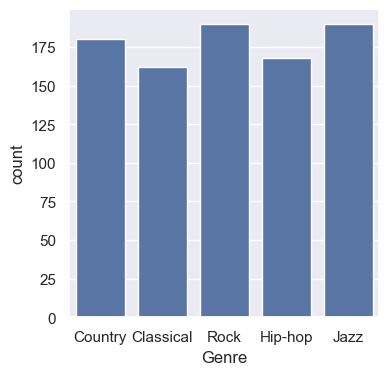

In [7]:
# Checking how Genre column is distributed
plt.figure(figsize=(4,4))
sns.countplot( data=df, x='Genre')
plt.show()

### Correlation Analysis

In [8]:
# Creating a copy of dataset
df2 = df.copy()

In [9]:
# Droping null values in Genre column of the duplicated copy of the dataset
df2.dropna(subset=['Genre'], inplace=True)

In [10]:
# Converting Catergorical Features to Numerical
from sklearn.preprocessing import LabelEncoder 
encoder  = LabelEncoder()
df2['Genre'] = encoder.fit_transform(df2['Genre'])

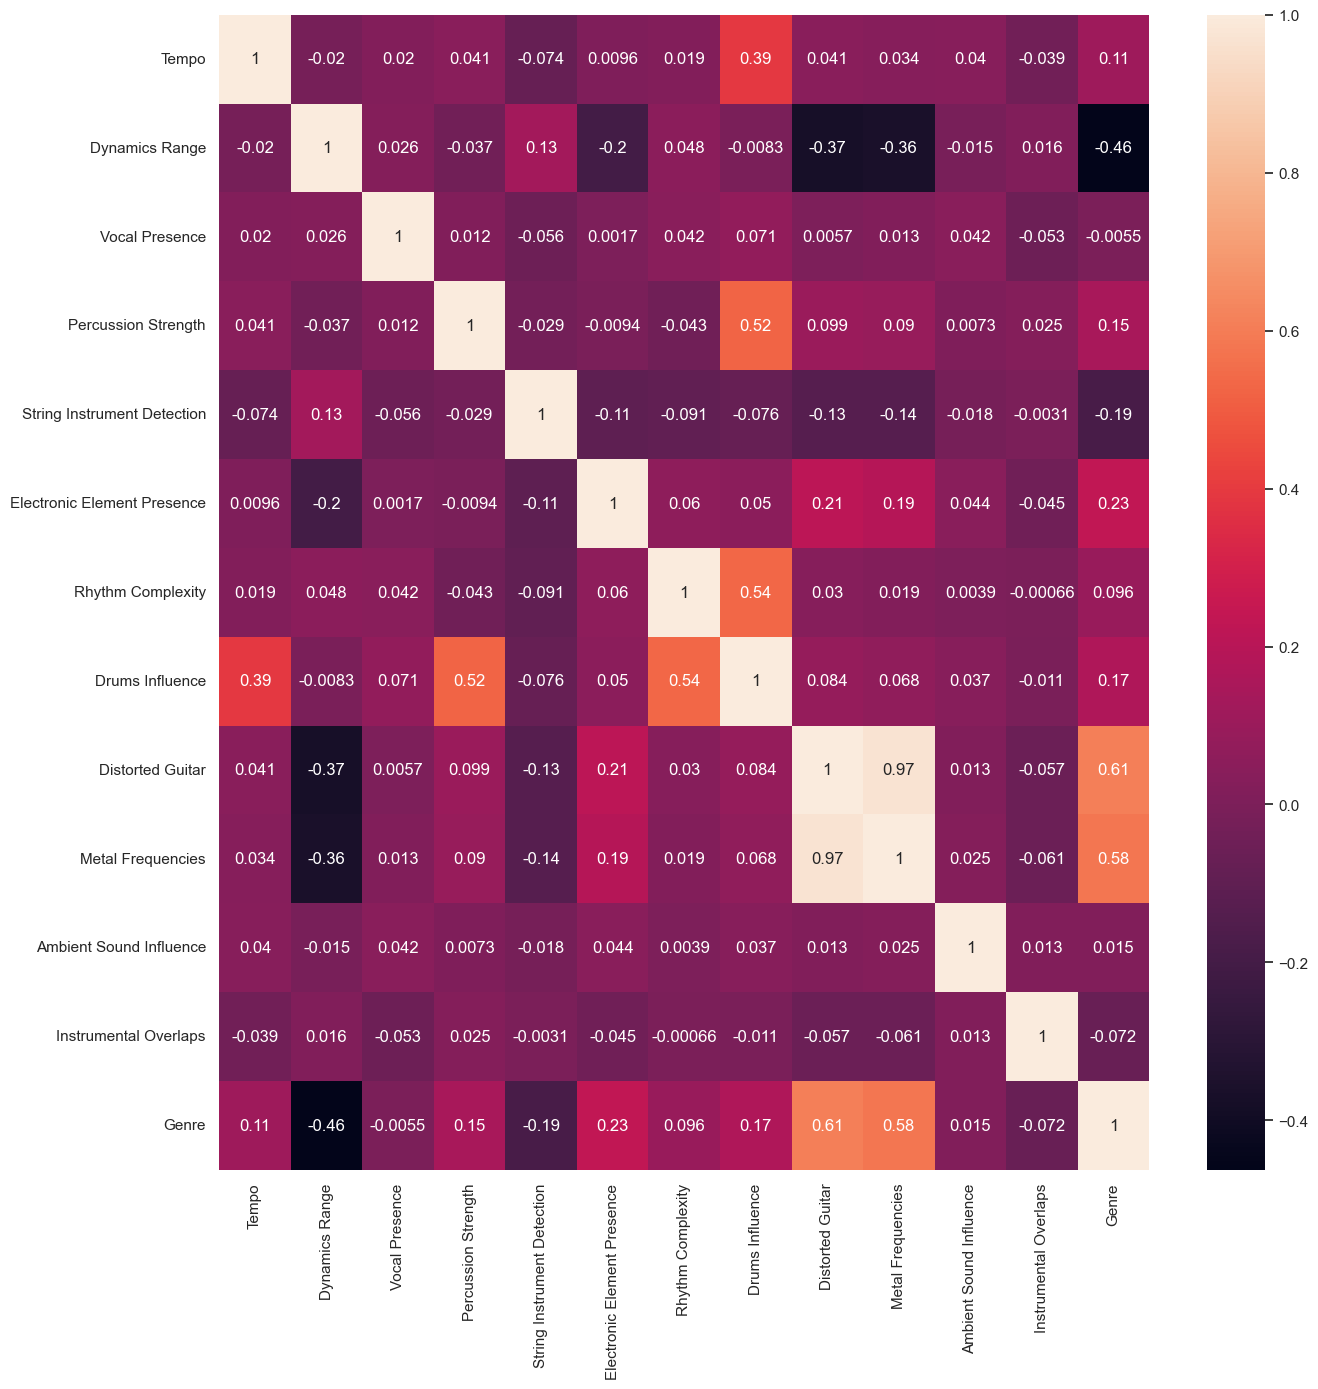

In [11]:
# Creating heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(), annot=True)
plt.show()

In [12]:
# Calculating correlation coefficient between  Metal Frequencies & Distorted Guitar
correlation = df['Metal Frequencies'].corr(df['Distorted Guitar'])
print(f"correlation coefficient of highly correlated \nMetal Frequencies & Distorted Guitar Columns:     {correlation:.4f}")


correlation coefficient of highly correlated 
Metal Frequencies & Distorted Guitar Columns:     0.9651


### PCA for Dimensionality Reduction

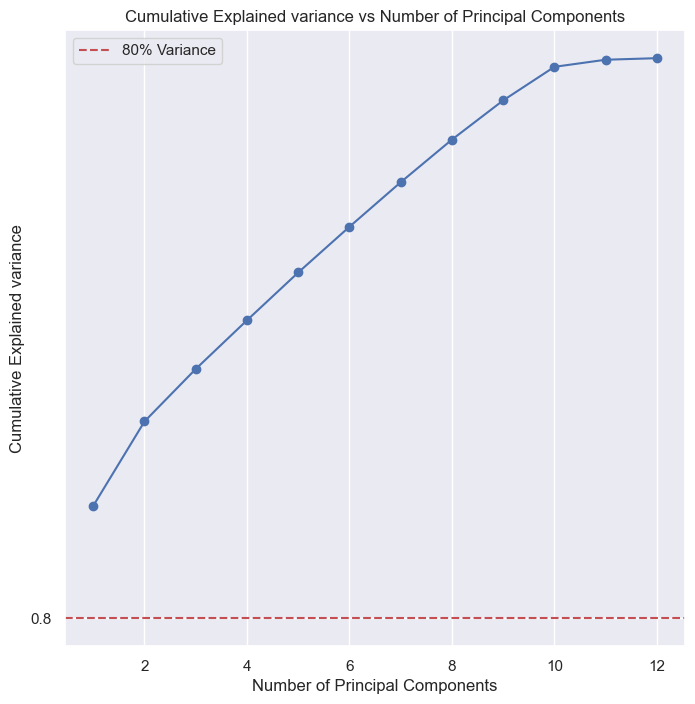

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Spliting of data 
X = df2.drop(columns='Genre')
y = df2['Genre']

# Standardising the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA without specifying the number of components 
pca = PCA()
# Fitting PCA on the scaled training data 
pca.fit(X_scaled)
# Transforming the training data 
X_train_pca = pca.transform(X_scaled)

# Calculating the exlained variance ratio of each component 
explained_variance_ratio = pca.explained_variance_ratio_

# Calculating the cumulative variance 
cumulative_variance = np.cumsum(explained_variance_ratio)

# Now let plot the cumulative variance 
plt.figure(figsize=(8,8))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-' )
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained variance')
plt.title('Cumulative Explained variance vs Number of Principal Components')
plt.axhline(y='0.8', linestyle='--', color='r', label='80% Variance')
plt.legend()
plt.grid(True)
plt.show() 


In [14]:
# Identifying minimum number of components neeeded  to reach at least 80% variance 
n_components = np.argmax(cumulative_variance >= 0.80) + 1
print(f"Number of components to retain 80% variance : {n_components}")

Number of components to retain 80% variance : 8


In [15]:
# Now, let reapply PCA  to the number of components 
optimal_pca = PCA(n_components=n_components)
X_pca = optimal_pca.fit_transform(X_scaled)
print(f"The Shape of X_pca : {X_pca.shape}") 

The Shape of X_pca : (890, 8)


## Model Creation 
#### Evaluating Classification Efficacy – PCA-Transformed vs. Original Data


In [16]:
# Splitting of data 
X_train_pca,X_test_pca,y_train,y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Training Logistic Reggression on  PCA-Transformed data
log_pca_model = LogisticRegression(max_iter=10000, random_state=42)
log_pca_model.fit(X_train_pca, y_train)

# Predicting & Evaluating PCA-Trained Model 
y_pred_pca = log_pca_model.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
classification_report_pca = classification_report(y_test, y_pred_pca)

print('Logistic Regression PCA- Accuracy : ', accuracy_pca)
print('Classification Report PCA :')
print(classification_report_pca)


Logistic Regression PCA- Accuracy :  0.5355805243445693
Classification Report PCA :
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        51
           1       0.32      0.23      0.27        52
           2       0.49      0.44      0.46        48
           3       0.41      0.42      0.42        62
           4       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



In [17]:
# Training Logistic Regression on Original  data
X_train_org, X_test_org,y_train_org,y_test_org  = train_test_split(X_scaled, y,test_size=0.3, random_state=42)

log_org_model = LogisticRegression(max_iter=10000, random_state=42)
log_org_model.fit(X_train_org, y_train_org)
y_pred_org = log_org_model.predict(X_test_org)
accuracy_org = accuracy_score(y_test_org, y_pred_org)
classification_report_org = classification_report(y_test_org, y_pred_org)

print('Logistic Regression Original- Accuracy : ', accuracy_org)
print('Classification Report Original :')
print(classification_report_org)


Logistic Regression Original- Accuracy :  0.5318352059925093
Classification Report Original :
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        51
           1       0.33      0.25      0.29        52
           2       0.45      0.46      0.45        48
           3       0.44      0.39      0.41        62
           4       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.54      0.52       267
weighted avg       0.51      0.53      0.52       267



In [18]:
##  Comparing Performances
print("\nComparision of Model Performances:")
print(f"Accurancy with PCA : {accuracy_pca:.2f}")
print(f"Accuracy with Original : {accuracy_org:.2f}")




Comparision of Model Performances:
Accurancy with PCA : 0.54
Accuracy with Original : 0.53


### Genre Prediction and Integration

In [19]:
# Isolate rows with missing Grnre
missing_genre_data = df[df['Genre'].isna()].copy() # Rows with missing Genre
no_missing_genre_data = df[~df['Genre'].isnull()].copy() # Rows with known Genre
# Removing Genre column for processing 
X_unknown = missing_genre_data.drop(columns=['Genre'])
X_known = no_missing_genre_data.drop(columns=['Genre'])
y_missing = missing_genre_data['Genre']

In [20]:
# Standardizing the data 
X_unknown_scaled = scaler.fit_transform(X_unknown)
X_known_scaled = scaler.fit_transform(X_known)

# Applying PCA 
if 'X_pca' in locals():
    X_unknown_pca = optimal_pca.transform(X_unknown_scaled)
else:
    X_unknown_pca = X_unkown_scaled

In [21]:
# Let apply Model to predict missing Genre
best_model = log_pca_model
predicted_genre_numeric = best_model.predict(X_unknown_pca)

#Transforming prediction to original label 
predicted_genre = encoder.inverse_transform(predicted_genre_numeric)

# Updating the original dataset 
missing_genre_data['Genre'] = predicted_genre # Filling the missing Genre predictions

# Combining back with no_missing_genre_data to have a complete dataset 
df_complete = pd.concat([no_missing_genre_data, missing_genre_data])

# Lets review the updated dataset
print('Updated Dataframe with filled missing Genre : ')
df_complete

Updated Dataframe with filled missing Genre : 


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,Hip-hop
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,Rock
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,Hip-hop
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,Hip-hop


In [22]:
# let confirm if Genre column still having any null values
df_complete['Genre'].isnull().sum()

0

In [23]:
df_complete.tail(10)

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
986,115.820458,37.092554,10.988344,52.575210,64.356889,53.590227,27.910854,71.091057,3.077411,0.000000,43.333268,56.212114,Hip-hop
987,136.977985,62.888793,63.270973,0.703554,62.644391,15.034021,77.455462,72.226077,73.418564,72.581818,81.710201,61.323477,Jazz
988,134.326266,12.643692,2.354950,12.446691,14.962571,103.030582,42.868958,56.467617,67.639094,76.611421,72.127719,79.416493,Hip-hop
989,132.866227,42.235387,85.929323,109.565586,99.895550,15.707783,30.425289,94.300105,84.738948,91.063647,22.857701,41.317227,Rock
990,145.665597,28.642070,52.657254,7.204516,94.165273,7.130571,78.159682,73.616978,94.777354,93.121865,46.236654,77.689609,Jazz
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,Hip-hop
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,Rock
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,Hip-hop
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,Hip-hop
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,Classical


## Insight